<a href="https://colab.research.google.com/github/MoBah1/Data-Projects/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT DATASET:BIKE SALES DATASET

This dataset is based off Bike sales across the United States this dataset contains 6 different bike models.





*   What are our overall sales trends and which factors most significantly impact our revenue?
*   How do purchasing patterns differ based on 'Customer_Age' and 'Customer_Gender'?
*   What is the distribution of 'Payment_Method' usage among customers? Does age group or gender play a role in Pricing?

VARIABLE DESCRIPTIONS:<br>
Sale ID: Customer order #<br>
Date: Date of Bike purchase<br>
Customer_ID: Identifies unique number per bike purchase<br>
Bike_Model: Identifies which of the 6 bike models were purchased<br>
Price: The cost of the bike<br>
Quantity:Identifies the number of bikes purchased during transaction<br>
Store Location: Identifies the location where the bike was purchased<br>
Salesperson_ID: Unique identifier for the salesperson involved in the sale<br>
Payment_Method: The method of payment used (e.g., Apple Pay, PayPal)<br>
Customer Age:  Age of the customer at the time of purchase<br>
Customer Gender:  Gender of the customer<br>

# 1.Load Data

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Libraries
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
#Read data
bike = pd.read_csv("/content/drive/MyDrive/MIS320_data/bike.csv")
bike

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,16-06-2022,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,Female
99996,99997,09-12-2023,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,Female
99997,99998,14-02-2020,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,Female
99998,99999,13-12-2023,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,Male


In [ ]:
#Examine the number of rows and columns
bike.shape

(100000, 11)

In [ ]:
#Show the head rows of the dataset
bike.head(n=10)

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female
5,6,06-09-2021,9663,Mountain Bike,1778.12,5,Chicago,829,Google Pay,42,Male
6,7,08-06-2020,6049,Hybrid Bike,1513.60,4,Philadelphia,916,Google Pay,20,Male
7,8,22-08-2021,5784,Road Bike,3825.94,1,Philadelphia,291,Debit Card,57,Male
8,9,04-10-2020,9649,Road Bike,614.94,3,San Antonio,906,Debit Card,62,Male
9,10,22-03-2023,3977,Electric Bike,2707.40,5,Los Angeles,562,PayPal,65,Male


In [ ]:
#Show the tail rows of the dataset
bike.tail(n=10)

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
99990,99991,08-03-2021,9372,Road Bike,4475.99,5,Los Angeles,324,PayPal,65,Female
99991,99992,31-03-2024,7426,Road Bike,4721.50,4,New York,315,PayPal,51,Female
99992,99993,29-12-2022,7114,Electric Bike,1312.30,2,Chicago,533,Apple Pay,63,Male
99993,99994,02-03-2024,2986,Mountain Bike,454.41,3,Phoenix,559,Cash,28,Male
99994,99995,17-11-2022,2669,BMX,2884.71,1,Philadelphia,984,Apple Pay,19,Female
99995,99996,16-06-2022,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,Female
99996,99997,09-12-2023,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,Female
99997,99998,14-02-2020,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,Female
99998,99999,13-12-2023,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,Male
99999,100000,09-01-2022,3090,Cruiser,2529.65,1,San Antonio,566,Debit Card,41,Female


In [ ]:
#Examine the index
bike.index

RangeIndex(start=0, stop=100000, step=1)

# 2.Data Cleaning

In [ ]:
#Examine the missing values
bike.isnull().sum()

,0
Sale_ID,0
Date,0
Customer_ID,0
Bike_Model,0
Price,0
Quantity,0
Store_Location,0
Salesperson_ID,0
Payment_Method,0
Customer_Age,0


In [ ]:
#Examine the duplicate data
bike.duplicated().sum()

0

In [ ]:
bike = bike.drop(columns=['Sale_ID', 'Date', 'Customer_ID', 'Salesperson_ID'])
bike

,Bike_Model,Price,Quantity,Store_Location,Payment_Method,Customer_Age,Customer_Gender
0,Cruiser,318.32,1,Philadelphia,Apple Pay,70,Female
1,Hybrid Bike,3093.47,4,Chicago,Apple Pay,37,Male
2,Folding Bike,4247.99,3,San Antonio,PayPal,59,Female
3,Mountain Bike,1722.01,3,San Antonio,Apple Pay,19,Male
4,BMX,3941.44,3,Philadelphia,PayPal,67,Female
...,...,...,...,...,...,...,...
99995,Hybrid Bike,3088.13,2,Philadelphia,PayPal,60,Female
99996,Road Bike,1051.44,2,Phoenix,Credit Card,67,Female
99997,Folding Bike,2783.79,4,Phoenix,Google Pay,37,Female
99998,Hybrid Bike,4265.42,4,Philadelphia,Credit Card,57,Male


# 3.Scatterplot and Boxplot Analysis

Text(0.5, 1.0, 'Distribution of Customer Ages by Bike Model')

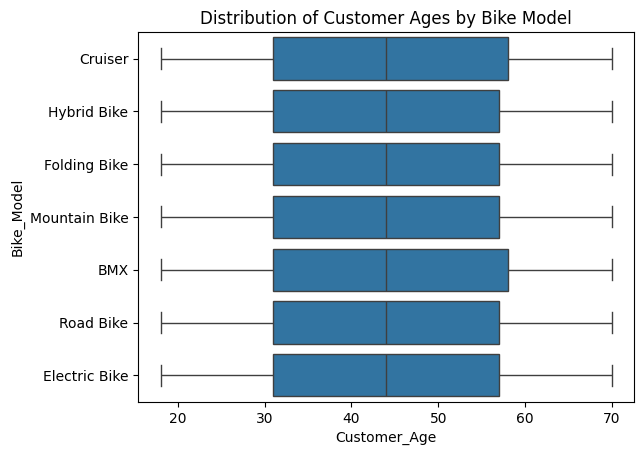

In [ ]:
#BoxPlot of Bike Models distributed by Customer Age
snsplot = sns.boxplot(x='Customer_Age', y='Bike_Model', data=bike)
snsplot.set_title("Distribution of Customer Ages by Bike Model")

Text(0.5, 1.0, 'Price Distribution by Bike Model and Gender')

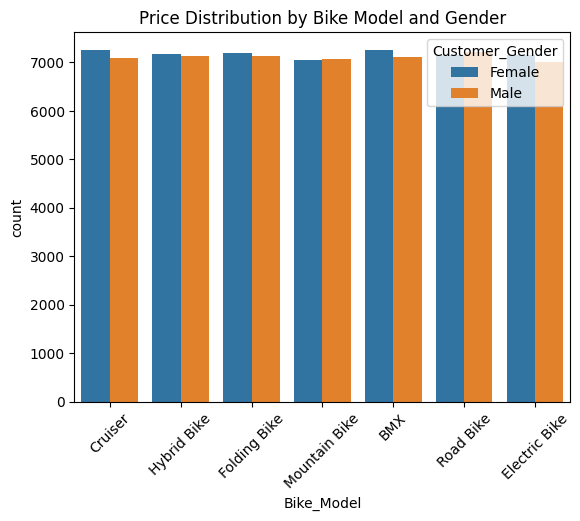

In [ ]:
#Countplot Price Distribution by Bike Model and Gender
snsplot = sns.countplot(x='Bike_Model', hue='Customer_Gender', data=bike)
plt.xticks(rotation=45)
snsplot.set_title('Price Distribution by Bike Model and Gender')

# Interpret Boxplot results
*   Based off the boxplot we can determine that the median age across all bike types is consistent and falls between 40-45 years old.

*  We can determine that since the age distributions are consistent there is no bike type that justifies it for a specific age group.


*   With the age variables ranging up to 70 years old, we can result in us marketing our product more towards younger people being that they are more fit and likely to continue biking.

#Interpret Countplot results


*   We can see again, the bikes are evenly distributed among males and females. There isn't a specific bike that primarly favors a gender and vice versa.
*   We can determine that Electric, Cruiser, and BMX bikes were the most popular bike categories throughout the dataset.






# 4.Data Transformation

In [ ]:
#Examine variable types
bike.dtypes

,0
Bike_Model,object
Price,float64
Quantity,int64
Store_Location,object
Payment_Method,object
Customer_Age,int64
Customer_Gender,object


In [ ]:
# Change categorical variable to category
bike['Bike_Model'] = bike['Bike_Model'].astype('category')
bike['Store_Location'] = bike['Store_Location'].astype('category')
bike['Payment_Method'] = bike['Payment_Method'].astype('category')
bike['Customer_Gender'] = bike['Customer_Gender'].astype('category')

In [ ]:
# Reexamine variable types
bike.dtypes

,0
Bike_Model,category
Price,float64
Quantity,int64
Store_Location,category
Payment_Method,category
Customer_Age,int64
Customer_Gender,category


In [ ]:
#Get dummy variables for Catergorical Variables
bike = pd.get_dummies(bike, columns=['Bike_Model', 'Store_Location', 'Payment_Method', 'Customer_Gender'] , drop_first=True, dtype=int)
bike

,Price,Quantity,Customer_Age,Bike_Model_Cruiser,Bike_Model_Electric Bike,Bike_Model_Folding Bike,Bike_Model_Hybrid Bike,Bike_Model_Mountain Bike,Bike_Model_Road Bike,Store_Location_Houston,...,Store_Location_New York,Store_Location_Philadelphia,Store_Location_Phoenix,Store_Location_San Antonio,Payment_Method_Cash,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Google Pay,Payment_Method_PayPal,Customer_Gender_Male
0,318.32,1,70,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3093.47,4,37,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4247.99,3,59,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1722.01,3,19,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3941.44,3,67,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3088.13,2,60,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
99996,1051.44,2,67,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
99997,2783.79,4,37,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
99998,4265.42,4,57,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


# 5.Clustering Analysis

In [ ]:
#Normalize Data Using Min-Max Scaling
min_max_scaler = preprocessing.MinMaxScaler()
bike_normalized = pd.DataFrame(min_max_scaler.fit_transform(bike))
bike_normalized.columns = bike.columns
bike_normalized

,Price,Quantity,Customer_Age,Bike_Model_Cruiser,Bike_Model_Electric Bike,Bike_Model_Folding Bike,Bike_Model_Hybrid Bike,Bike_Model_Mountain Bike,Bike_Model_Road Bike,Store_Location_Houston,...,Store_Location_New York,Store_Location_Philadelphia,Store_Location_Phoenix,Store_Location_San Antonio,Payment_Method_Cash,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Google Pay,Payment_Method_PayPal,Customer_Gender_Male
0,0.024649,0.00,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.602829,0.75,0.365385,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.843364,0.50,0.788462,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.317097,0.50,0.019231,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.779497,0.50,0.942308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.601717,0.25,0.807692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99996,0.177389,0.25,0.942308,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99997,0.538310,0.75,0.365385,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.846996,0.75,0.750000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Build a clustering model with n_clusters = 4. Set random_state=42.
model1 = KMeans(n_clusters=4, random_state=42)
model1.fit(bike_normalized)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Generate the cluster labels
model1.labels_

array([2, 1, 2, ..., 3, 1, 2], dtype=int32)

In [ ]:
# Show cluster size
Counter(model1.labels_)

Counter({2: 33532, 1: 33163, 3: 16613, 0: 16692})

In [ ]:
# Show cluster centroids
pd.DataFrame({
    'cluster 1': bike[model1.labels_ == 0].mean(axis=0),
    'cluster 2': bike[model1.labels_ == 1].mean(axis=0),
    'cluster 3': bike[model1.labels_ == 2].mean(axis=0),
    'cluster 4': bike[model1.labels_ == 3].mean(axis=0),
})

,cluster 1,cluster 2,cluster 3,cluster 4
Price,2596.419405,2597.145693,2596.251910,2605.919435
Quantity,3.000000,2.990170,3.006949,2.988202
Customer_Age,43.931943,44.114374,43.958905,44.184313
Bike_Model_Cruiser,0.143722,0.143141,0.142938,0.144044
Bike_Model_Electric Bike,0.140966,0.142508,0.141954,0.140252
Bike_Model_Folding Bike,0.145040,0.142116,0.143326,0.143803
Bike_Model_Hybrid Bike,0.142523,0.142599,0.142670,0.146090
Bike_Model_Mountain Bike,0.139947,0.142357,0.141745,0.138506
Bike_Model_Road Bike,0.144381,0.142900,0.143028,0.145549
Store_Location_Houston,0.145519,0.140156,0.140761,0.141576


# Interprert the Cluster Results
Cluster 1: Cash Only <br>
Cluster 2: Male/Multipay User <br>
Cluster 3: Female/Multipay Users <br>
Cluster 4: Digital Enthusiasts <br>

Text(0.5, 1.0, 'Elbow Test')

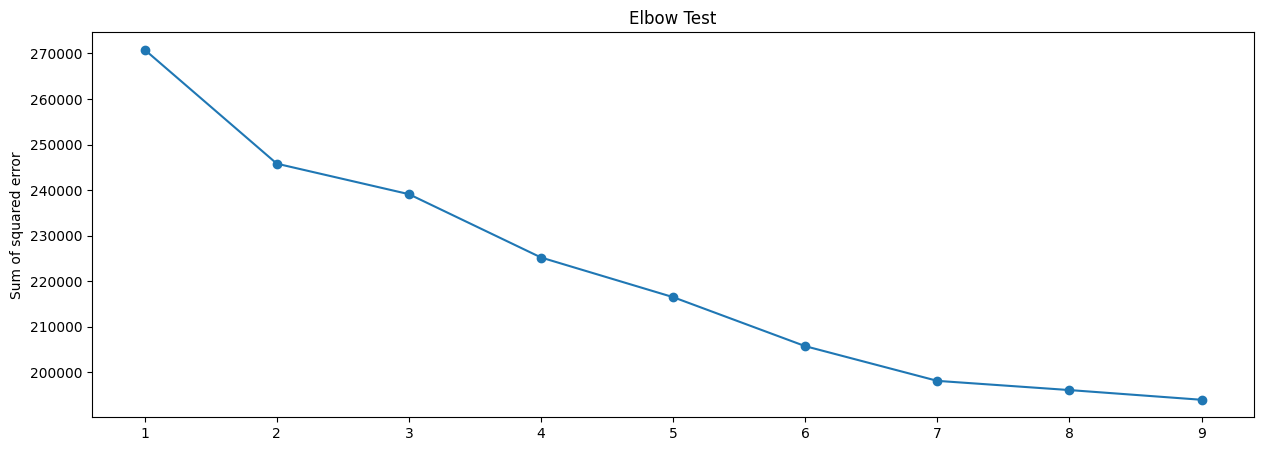

In [ ]:
#Elbow Test
Sum_of_squared_error = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bike_normalized)
    Sum_of_squared_error.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.scatter(range(1, 10), Sum_of_squared_error)
plt.plot(range(1, 10), Sum_of_squared_error)
plt.ylabel('Sum of squared error')
plt.title('Elbow Test')